In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [23]:
M1=pd.read_excel("Modal-Sales.xlsx")

### Data Description

In [24]:
M1.head

<bound method NDFrame.head of                   SKU        ASIN  QTY Sold          INV      Price  Views  \
0           251648BLK  B07GVPH7KF      58.0   538.571429  59.551429  614.0   
1              251848  B07HL4PD1S      32.0   318.571429  69.938571   86.0   
2           251848BLK  B07G7D6PYT      40.0   727.285714  91.725000  217.0   
3              251648  B07FVYTYYV      38.0   570.714286  64.908571  233.0   
4              87K545  B07PWMTRYJ     133.0  1673.857143  19.480000  764.0   
..                ...         ...       ...          ...        ...    ...   
113         67K645BLK  B07W7W6PTG      17.0    66.142857  35.614286   67.0   
114  8170-8170H-E14.2  B07X2VD4DW       0.0          NaN        NaN    0.0   
115         33K567BLK  B07V1YBRKW      12.0    44.000000  28.758571   29.0   
116        33K548SBLK  B07YSVN5SB       0.0     0.000000  24.435714    0.0   
117    6550-6135H-D.2  B07WZPR7NN       0.0          NaN        NaN    0.0   

     Rating  Content Aplus  
0   

In [25]:
M1.describe()

,QTY Sold,INV,Price,Views,Rating,Content
count,117.000000,97.000000,98.000000,115.000000,111.000000,116.000000
mean,14.145299,102.930781,39.476691,75.904348,4.448108,9.390776
std,19.485744,205.088955,20.588543,114.613995,0.216020,0.813971
min,0.000000,0.000000,11.605714,0.000000,3.600000,7.000000
25%,1.000000,6.142857,21.883036,4.500000,4.340000,8.960000
50%,9.000000,53.285714,30.696429,40.000000,4.500000,9.740000
75%,18.000000,105.285714,56.747143,90.000000,4.600000,10.000000
max,133.000000,1673.857143,97.990000,764.000000,4.700000,10.000000


In [26]:
M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SKU       118 non-null    object 
 1   ASIN      118 non-null    object 
 2   QTY Sold  117 non-null    float64
 3   INV       97 non-null     float64
 4   Price     98 non-null     float64
 5   Views     115 non-null    float64
 6   Rating    111 non-null    float64
 7   Content   116 non-null    float64
 8   Aplus     118 non-null    object 
dtypes: float64(6), object(3)
memory usage: 8.4+ KB


In [27]:
MT = pd.get_dummies(M1)

In [28]:
MT.head()

,QTY Sold,INV,Price,Views,Rating,Content,SKU_251545,SKU_002703,SKU_002705L,SKU_1012BOW,...,ASIN_B07ZHLRL4R,ASIN_B07ZHLT8FS,ASIN_B07ZHLY3XX,ASIN_B08429K8T1,ASIN_B08429R7SP,ASIN_B085FT1LSJ,ASIN_B0891T9SYC,ASIN_B0947C47TX,Aplus_N,Aplus_Y
0,58.0,538.571429,59.551429,614.0,4.7,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,32.0,318.571429,69.938571,86.0,4.6,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,40.0,727.285714,91.725000,217.0,4.7,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,38.0,570.714286,64.908571,233.0,4.6,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,133.0,1673.857143,19.480000,764.0,4.6,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Meta Data

* SKU:Stock Keeping Unit
* ASIN:Amazon Standard Identification Number
* QTY Sold: Total sold quantiy for the particular item during the week of 5/16/2021.
* INV: Average inventory level for the for the particular item during the week of 5/16/2021.
* Price: Average price for the for the particular item during the week of 5/16/2021.
* Views: Total number of clicks recived by the particular item during the week of 5/16/2021.
* Ratings: Average product evaluation score given by customer for the the particular item during the week of 5/16/2021.
* Content: Product page content quality score out of 10.
* Aplus: Shows whether the prodcut has an A plus page on amazon.com. 

### Goal

We want to see how the Inventory Level, Views, Price, Ratings, Listing Quality Score (AKA Helium Score) effect the Item Sold Quantity, and which one has the largest effect. 

### Method 

* Stepwise Multiple Linear Regression
* IV: INV, Price, Views, Ratings, Content
* DV: QTY Sold

### Data Wrangling

In [29]:
M1.columns

Index(['SKU', 'ASIN', 'QTY Sold', 'INV', 'Price', 'Views', 'Rating', 'Content',
       'Aplus'],
      dtype='object')

In [30]:
M1 = M1[['QTY Sold', 'INV', 'Price', 'Views', 'Rating', 'Content']]

In [31]:
M1

,QTY Sold,INV,Price,Views,Rating,Content
0,58.0,538.571429,59.551429,614.0,4.7,10.00
1,32.0,318.571429,69.938571,86.0,4.6,10.00
2,40.0,727.285714,91.725000,217.0,4.7,10.00
3,38.0,570.714286,64.908571,233.0,4.6,10.00
4,133.0,1673.857143,19.480000,764.0,4.6,10.00
...,...,...,...,...,...,...
113,17.0,66.142857,35.614286,67.0,4.5,10.00
114,0.0,NaN,NaN,0.0,4.4,9.63
115,12.0,44.000000,28.758571,29.0,4.6,10.00
116,0.0,0.000000,24.435714,0.0,NaN,9.45


In [32]:
M1= M1.dropna()

### Testing for Assumptions

* Linear relationship
* Homoscedasticity
* Homogenity of variance
* The x's are fixed and measured without error
* Multicollinearity
* Lack of outliers


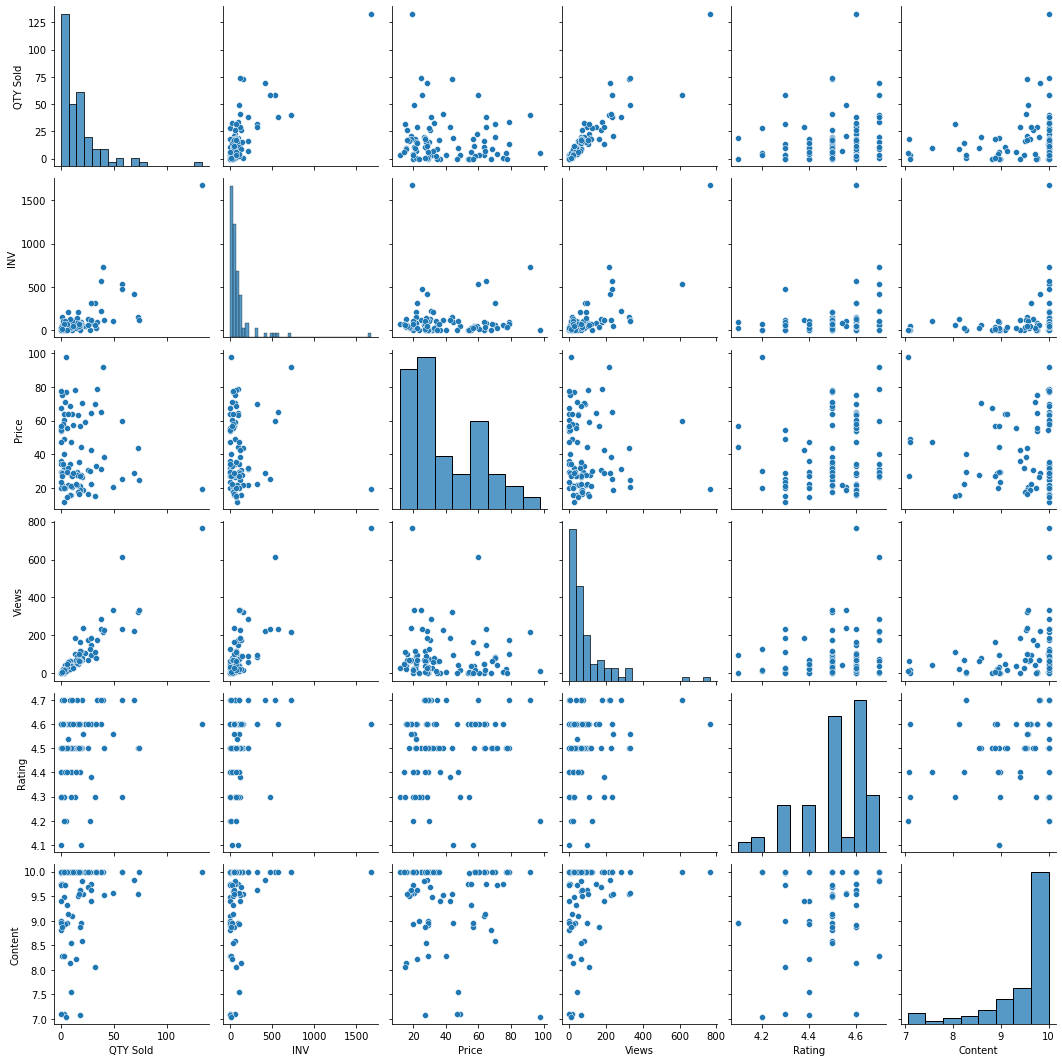

In [33]:
sns.pairplot(M1)

In [43]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [44]:
x = M1[['INV', 'Price', 'Views', 'Rating', 'Content']]
y = M1['QTY Sold']

In [45]:
model = sm.OLS(y,x).fit()

In [48]:
pred_val = model.fittedvalues.copy()
true_val = M1['QTY Sold'].values.copy()
residual = true_val - pred_val

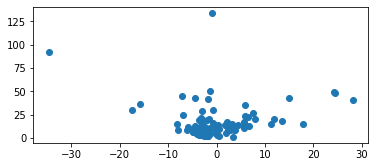

In [49]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [50]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=nan, pvalue=nan)

In [51]:
M1.corr()


,QTY Sold,INV,Price,Views,Rating,Content
QTY Sold,1.000000,0.771493,-0.097170,0.912789,0.179776,0.203228
INV,0.771493,1.000000,0.000276,0.770970,0.188857,0.214970
Price,-0.097170,0.000276,1.000000,-0.057452,0.087449,-0.060382
Views,0.912789,0.770970,-0.057452,1.000000,0.187313,0.213929
Rating,0.179776,0.188857,0.087449,0.187313,1.000000,0.266048
Content,0.203228,0.214970,-0.060382,0.213929,0.266048,1.000000


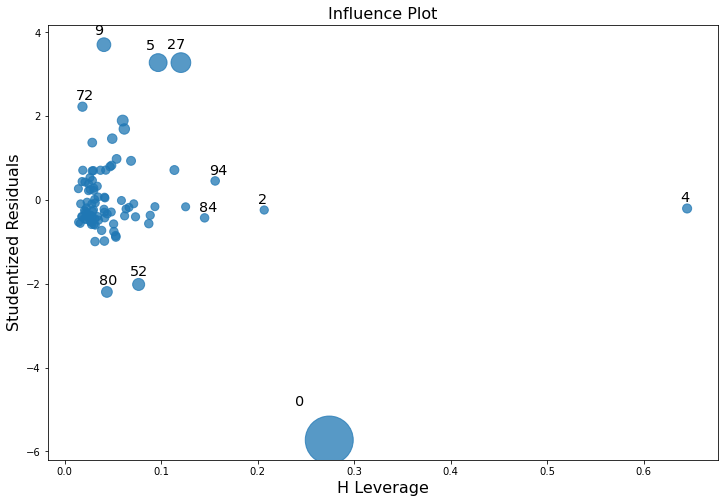

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               QTY Sold   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              173.2
Date:                Sun, 06 Jun 2021   Prob (F-statistic):                    1.18e-43
Time:                        20:48:34   Log-Likelihood:                         -322.84
No. Observations:                  92   AIC:                                      655.7
Df Residuals:                      87   BIC:                                      668.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INV            0.0171      0.007      2.612      0.011       0.004       0.030
Price         -0.0538      0.042     -1.267      0.209      -0.138       0.031
Views          0.1321      0.011     11.719      0.000       0.110       0.155
Rating         1.4755      2.560      0.576      0.566      -3.613       6.564
Content       -0.1345      1.193     -0.113      0.910      -2.505       2.236
==============================================================================
Omnibus:                       19.766   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.884
Skew:                           0.286   Prob(JB):                     2.77e-23
Kurtosis:                       8.174   Cond. No.                         877.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""